# Solar cell

### EECS 16B: Designing Information Devices and Systems II

# Motivation

In this python exercise we will show how the solution to our simplified solar cell can model the charge distribution and how it is affected by the recombination term in the more realistic solution.

In [3]:
# Imports
%matplotlib notebook
from ipywidgets import interactive, widgets
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Set display settings
from IPython.display import display, HTML
js = """<script>
IPython.notebook.kernel.execute("cell_width_px="+($( ".cell").width()))
</script>"""
display(HTML(js))
dx = 0.1
height = 10

# Part (d): Visualizing charge distribution
First, add your solution for charge distribution (which you solved for in part (b)) as the function $q_d (x)$. Note that this function should be in terms of $x$ as well as the parameters $L$ and $q_0$. Then, the interactive plot below shows the effect of the parameters $q_0$ and $L$ on the solution. See the block below the plots for more information.

In [8]:
# Add your function for q(x) from part (d) here
def q_d(x, l, q0):
    return ?

<IPython.core.display.Javascript object>


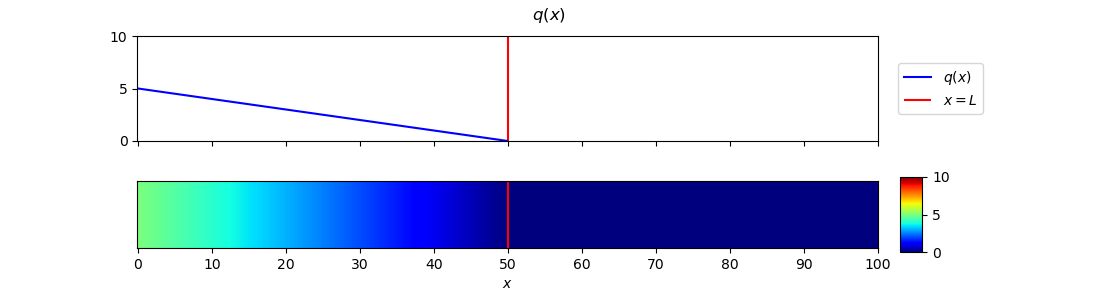

interactive(children=(IntSlider(value=50, description='$L$', min=10, step=5), FloatSlider(value=5.0, descripti…

In [9]:
# Set up figure
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(cell_width_px / 100, 3))
plt.suptitle("$q(x)$")
plt.xlabel("$x$")
plt.xticks(np.linspace(0, 100 / dx, int(1 / dx) + 1, endpoint=True), np.arange(0, 101, 10))

# Plot lines
l = 50
q0 = 5.0
x1 = np.linspace(0, 100, int(100 / dx) + 1, endpoint=True)
line, = ax1.plot(x1[:int(l / dx)] / dx, q_d(x1, l, q0)[:int(l / dx)], color="b")
ax1.set_ylim(0, 10)
ax1.set_xlim(-1, 100 / dx + 1)
bound = ax1.vlines(l / dx, 0, height, color="r")
ax1.legend([line, bound], ["$q(x)$", "$x = L$"], bbox_to_anchor=(1.15, 0.5), loc='center right')

# Plot heatmap
x2 = np.repeat(x1[None, :], height, axis=0)
im = ax2.imshow(q_d(x2, l, q0), cmap=plt.cm.jet, aspect=10.)
bound2 = ax2.vlines(l / dx, 0, height, color="r")
ax2.set_ylim(0,height-1)
im.set_clim(0.0, 10.0)
ax2.set_yticks([])

# Add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.16, 0.02, 0.25])
fig.colorbar(im, ax=ax2, cax=cbar_ax)

# Main update function for interactive plot
def update(l=50, q0=5.0):
    line.set_data(x1[:int(l / dx)] / dx, q_d(x1, l, q0)[:int(l / dx)])
    im.set_data(q_d(x2, l, q0))
    bound.set_segments([np.array([[l / dx, 0],[l / dx, height]])])
    bound2.set_segments([np.array([[l / dx, 0],[l / dx, height]])])
    fig.canvas.draw_idle()
    

# Include sliders for relevant quantities
interactive_plot = interactive(update, 
                               l=widgets.IntSlider(value=50, min=10, max=100, step=5, description="$L$"), 
                               q0=widgets.FloatSlider(value=5.0, min=0.0, max=10.0, step=0.1, description="$q_0$"))
output = interactive_plot.children[-1]
interactive_plot

Both plots show the same information, but in two different ways. The top plot is a line plot that directly shows $q(x)$ as a function of $x$. The bottom plot is a heatmap that models the amount of charge at a certain distance $x$ (similar to the diagram in the problem, redder values indicate more charge). The vertical red line represents $x = L$ in both plots.

# Part (h): Plotting a more realistic model with random recombination
A solution for part (g) is given in the code below as the function $q_g (x)$. Similarly to above, there are two interactive plots that show the effects of $L$, $q_0$, and $K_2 / K$ on the amount of charge across $x$. See the text below the plot for more information.

In [13]:
# Define relevant q(x) quantities for interactive plotting (part (g))
def q_g_pos(x, q0, K2_div_K):
    return -q0 * np.exp(x * np.sqrt(K2_div_K))

def q_g_neg(x, q0, K2_div_K):
    return q0 * np.exp(-x * np.sqrt(K2_div_K))

def q_g_a_pos(l, K2_div_K):
    beta = np.exp(-2 * l * np.sqrt(K2_div_K))
    return beta / (1 - beta)

def q_g_a_neg(l, K2_div_K):
    beta = np.exp(-2 * l * np.sqrt(K2_div_K))
    return 1 / (1 - beta)

def q_g(x, l, q0, K2_div_K):
    beta = np.exp(-2 * l * np.sqrt(K2_div_K))
    return q0 * (np.exp(-x * np.sqrt(K2_div_K)) - beta * np.exp(x * np.sqrt(K2_div_K))) / (1 - beta)

<IPython.core.display.Javascript object>


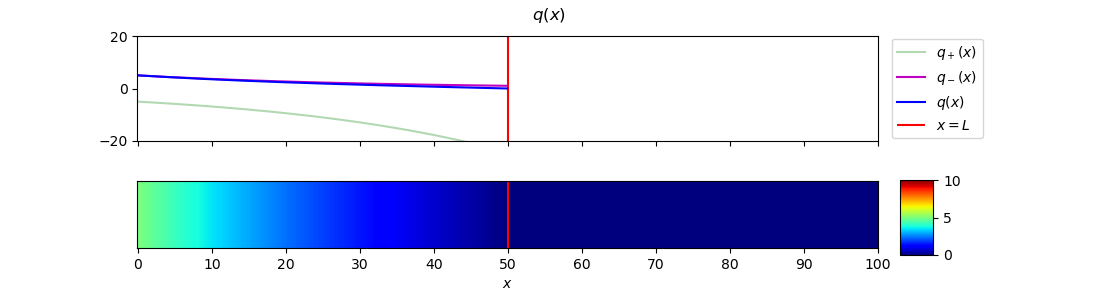

interactive(children=(IntSlider(value=50, description='$L$', min=10, step=5), FloatSlider(value=5.0, descripti…

In [15]:
# Setup figure
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(cell_width_px / 100, 3))
plt.suptitle("$q(x)$")
plt.xlabel("$x$")
plt.xticks(np.linspace(0, 100 / dx, int(1 / dx) + 1, endpoint=True), np.arange(0, 101, 10))

# Plot lines
K2_div_K = 1e-3
x1 = np.linspace(0, 100, num=int(100 / dx) + 1, endpoint=True)
alpha_pos = max(min(abs(q_g_a_pos(l, K2_div_K)), 1), 0.3)
alpha_neg = max(min(abs(q_g_a_neg(l, K2_div_K)), 1), 0.3)
line_pos, = ax1.plot(x1[:int(l / dx)] / dx, q_g_pos(x1, q0, K2_div_K)[:int(l / dx)], color="g", alpha=alpha_pos)
line_neg, = ax1.plot(x1[:int(l / dx)] / dx, q_g_neg(x1, q0, K2_div_K)[:int(l / dx)], color="m", alpha=alpha_neg)
line, = ax1.plot(x1[:int(l / dx)] / dx, q_g(x1, l, q0, K2_div_K)[:int(l / dx)], color="b")
ax1.set_ylim(-20, 20)
ax1.set_xlim(-1, 100 / dx + 1)
bound = ax1.vlines(l / dx, -20, 20, color="r")
ax1.legend([line_pos, line_neg, line, bound], ["$q_+(x)$", "$q_-(x)$", "$q(x)$", "$x = L$"])

# Plot heatmap
x2 = np.repeat(x1[None, :], height, axis=0)
im = ax2.imshow(q_g(x2, l, q0, K2_div_K), cmap=plt.cm.jet, aspect=10.)
bound2 = ax2.vlines(l / dx, 0, height, color="r")
ax2.set_ylim(0,height-1)
im.set_clim(0.0, 10.0)
ax2.set_yticks([])

# Add colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.03, 0.25])
fig.colorbar(im, ax=ax2, cax=cbar_ax)

# Main update loop for interactive plot
def update(l=50, q0=5.0, K2_div_K=1e-3):
    line_pos.set_data(x1[:int(l / dx)] / dx, q_g_pos(x1, q0, K2_div_K)[:int(l / dx)])
    alpha_pos = max(min(abs(q_g_a_pos(l, K2_div_K)), 1), 0.3)
    line_pos.set_alpha(alpha_pos)
    line_neg.set_data(x1[:int(l / dx)] / dx, q_g_neg(x1, q0, K2_div_K)[:int(l / dx)])
    alpha_neg = max(min(abs(q_g_a_neg(l, K2_div_K)), 1), 0.3)
    line_neg.set_alpha(alpha_neg)
    line.set_data(x1[:int(l / dx)] / dx, q_g(x1, l, q0, K2_div_K)[:int(l / dx)])
    ax1.legend([line_pos, line_neg, line, bound], ["$q_+(x)$", "$q_-(x)$", "$q(x)$", "$x = L$"], bbox_to_anchor=(1.15, 0.5), loc='center right')
    im.set_data(q_g(x2, l, q0, K2_div_K))
    bound.set_segments([np.array([[l / dx, -20],[l / dx, 20]])])
    bound2.set_segments([np.array([[l / dx, 0],[l / dx, height]])])
    fig.canvas.draw_idle()
    

# Include sliders for relevant quantities
interactive_plot = interactive(update, 
                               l=widgets.IntSlider(value=50, min=10, max=100, step=5, description="$L$"), 
                               q0=widgets.FloatSlider(value=5.0, min=0.0, max=10.0, step=0.1, description="$q_0$"),
                               K2_div_K=widgets.FloatLogSlider(value=1e-3, 
                                                               base=10, 
                                                               min=-6, 
                                                               max=1.5, 
                                                               step=0.25, 
                                                               description='$K_2/K$'))
output = interactive_plot.children[-1]
interactive_plot

The line plots show the contributions from the positive exponential term (labeled $q_+(x)$ in green) and the negative exponential term (labeled $q_-(x)$ in purple). Each line is given an alpha value based on the size of its $\alpha$ weighting term (lighter colors mean that that term is contributing less to the overall solution). The blue line is the weighted sum of the two contributing terms. As before, the heatmap shows the same visualization using color, with redder colors indicating more charge at that value. What do you notice as you change $K_2 / K$? What happens when $K_2 / K \approx 0$? How do the contributions from each term change as you change each quantity?